In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.time_series_model_training import *

In [3]:
forecaster = TimeSeriesForecaster("../data/TSLA_historical_data.csv")

In [4]:
TSLA_df = forecaster._load_data()

In [6]:
forecaster.scale_data("../models/TSLA_scaler.pkl")

In [7]:
forecaster.split_data()

In [8]:
xs, ys = forecaster.create_sequences(TSLA_df, 90)

In [9]:
forecaster.train_arima()

Performing stepwise search to minimize aic


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10955.656, Time=0.83 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10963.793, Time=1.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10963.900, Time=4.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10955.457, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10961.855, Time=4.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10961.919, Time=5.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10960.151, Time=9.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10963.303, Time=1.61 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 28.333 seconds


In [10]:
forecaster.train_sarima()

Performing stepwise search to minimize aic


 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-9639.148, Time=1.95 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-10260.642, Time=16.77 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=35.34 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-9656.389, Time=0.78 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-10491.817, Time=15.37 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=71.96 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=62.42 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-10482.453, Time=3.46 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-10490.555, Time=12.23 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-10490.183, Time=23.45 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-10492.473, Time=9.07 sec
 ARIMA(0,1,1)(1,1,0)[5]             : AIC=-10262.381, Time=8.70 sec
 ARIMA(0,1,1)(2,1,1)[5]             : AIC=inf, Time=46.70 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=inf, Time=36.56 sec
 ARIMA(0,1,2)(2,1,0)[5]             : AIC=-10491.183, Time=25.20 sec
 ARIMA(

In [11]:
forecaster.train_lstm()

c:\Users\Ashis\Desktop\KAIM Program 2\week_11\week_11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - loss: 0.0043 - val_loss: 0.0069
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.7487e-04 - val_loss: 0.0101
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3.4759e-04 - val_loss: 0.0066
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.9187e-04 - val_loss: 0.0047
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.5172e-04 - val_loss: 0.0102
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 3.0019e-04 - val_loss: 0.0074
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.4974e-04 - val_loss: 0.0057
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.7866e-04 - val_loss: 0.0094
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 2.4745e-04 - val_loss: 0.0049
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 2.2258e-04 - val_loss: 0.0046
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 2.1026e-04 - val_loss: 0.0051
Epoch 12/50
44/44 ━━━

In [12]:
forecaster.make_predictions()

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step


In [13]:
forecaster.evaluate_models()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


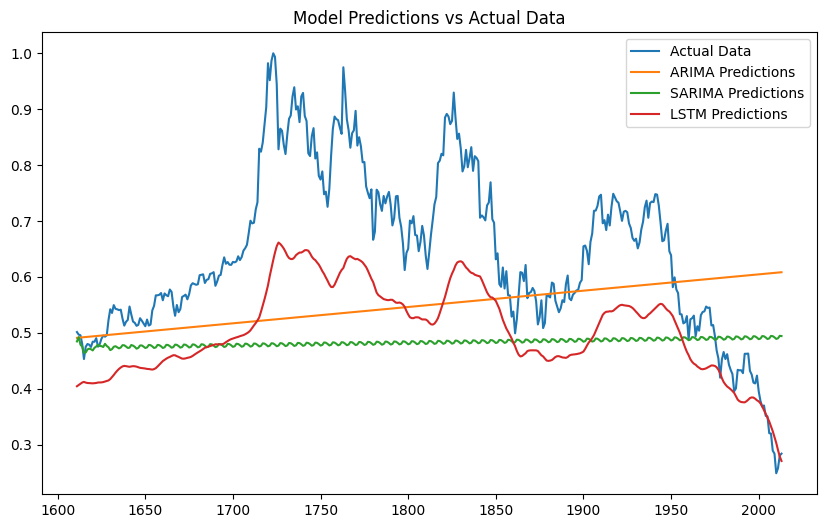

In [14]:
forecaster.plot_results()

In [15]:
forecaster.forecast_future()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

{'LSTM': [0.26530936,
  0.26050246,
  0.25611705,
  0.25202972,
  0.24816686,
  0.24448247,
  0.24094714,
  0.23754162,
  0.23425284,
  0.23107155,
  0.22799093,
  0.22500566,
  0.22211133,
  0.21930428,
  0.21658118,
  0.213939,
  0.21137492,
  0.20888627,
  0.2064705,
  0.20412518,
  0.20184791,
  0.19962458,
  0.19744495,
  0.19530147,
  0.19318846,
  0.19110171,
  0.1890381,
  0.18699531,
  0.18497154,
  0.18296546]}